# Interpolación de Lagrange

El problema de encontrar un polinomio de primer grado que pasa por los puntos distintos $(x_0, y_0)$ y $(x_1, y_1)$ es el mismo que el de aproximar una función $f$, para la cual se cumple que $f(x_0) = y_0$ y $f(x_1) = y_1$ por medio de un polinomio de primer grado que interpole los valores de $f$ en los puntos dados que coincida con ellos. Primero, definimos las funciones

$$ L_0(x) = \dfrac{x - x_1}{x_0 - x_1} $$ 

y 

$$ L_1(x) = \dfrac{x - x_0}{x_1 - x_0} $$

definiendo $P(x)$ como:

$$ P(x) = L_0(x)f(x_0) + L_1(x)f(x_1) $$

como

$$ L_0(x_0) = 1 $$      
$$ L_0(x_1) = 0 $$
$$ L_1(x_0) = 0 $$      
$$ L_1(x_1) = 1 $$

se tiene que:

$$ P(x_0) = f(x_0) = y_0 $$
$$ P(x_1) = f(x_1) = y_1 $$

Generalizando para n puntos de la forma $ (x_0, f(x_0)), (x_1, f(x_1)), ... (x_n, f(x_n)) $ se construye la función $ L_{n, k}(x) $ para cada $ k = 0,1,..., n $ con la propiedad de que $ L_{n, k}(x_i) = 0 $ cuando $ i \neq k $ y $ L_{n, k}(x_k) = 1 $ cuando $ i = k $. 

Para satisfacer $ L_{n, k}(x_i) = 0 $ se requiere que el numerador de $ L_{n,k}(x) $ contenga el termino:

$$ (x-x_0)(x-x_1) ... (x-x_{k-1})(x-x_{k+1}) ... (x-x_{n}) $$

Para $ L_{n, k}(x_k) = 1 $, el denominador de $ L_{n,k}(x) $ debe coincidir con este término cuando se evalúe en $ x = x_k $

$$ L_{n,k}(x) = \dfrac{(x-x_0) ... (x-x_{k-1})(x-x_{k+1}) ... (x-x_{n})}{(x_k-x_0) ... (x_k-x_{k-1})(x_k-x_{k+1}) ... (x_k-x_{n})} $$

Si $ x_0, x_1, ..., x_n $ son $ n + 1 $ puntos distintos y si f es una función cuyos valores están dados en esos números, entocnes existe un único polinomio $ P_(x) $ de grado a lo más $ n $, con la propiedad de que $ f(x_k) $ = $ P(x_k) $ para cada $ k = 0,1,...,n $ 

Este polinomio está dado por

$$ P(x) = f(x_0)L_{n,0}(x) + ... + f(x_n)L_{n,n}(x) = \sum_{k=0}^n f(x_k)L_{n,k}(x) $$

donde para cada $ k= 0,1,...n $

$$ L_{n,k}(x) = \prod_{i=0, i \neq k}^n \dfrac{x-x_i}{x_k-x_i} $$

Tomando como ejemplo $ k = 0,1,2 $, se tiene que $ L_{n, k}(x_i) $

$$ L_{2,0}(x) = \dfrac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} $$
$$ L_{2,1}(x) = \dfrac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} $$
$$ L_{2,2}(x) = \dfrac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} $$

de este modo se tiene que:

$$ P(x) = f(x_0)L_{2,0}(x) + f(x_1)L_{2,1}(x) + f(x_2)L_{2,2}(x) $$

In [139]:
%reset -f

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [141]:
def cm2inch(cm: float) -> float:
    return cm * (1 / 2.54)

Esta celda solo es para evitar lineas blancas al momento de realizar un gráfica usando un tema personalizado en vscode.

In [142]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>

# Paleta de colores

Una paleta de colores personalizada

In [143]:
colors ={
    'red': '#EB1E2C',
    'orange1': '#FD6F30',
    'orange2': '#F9A729',
    'yellow': '#F9D23C',
    'green': '#5FBB68',
    'blue': '#00A5E3',
    'teal': '#64CDCC',
    'aqua': '#91DCEA',
    'purple': '#A4A4D5',
    'ligth_purple': '#BBC9E5',
}

In [144]:
def ejex(xmin: int, xmax: int, npuntos: int) -> list:

    n = npuntos
    x1 = xmin
    x2 = xmax
    deltax = (x2 - x1) / n
    
    vector = []

    for i in range(n + 1):
        vector.append(xmin + (deltax * i))

    return vector

In [145]:
def interpolacion_lagrange(x: list, y: list, xinter: int) -> list:
    
    len_x = len(x)
    pol = 0
    polinomio = []

    for k in range(len_x):
        num = 1
        den = 1
        for i in range(len_x):
            if i != k:
                num = num * (xinter - x[i])
                den = den * (x[k] - x[i])
        pol = pol + ((num/den) * y[k])
    polinomio.append(pol)
    
    return polinomio

In [146]:
def polinomio_lagrange(x: list, y: list, xmin: int, xmax: int, npuntos: int) -> list:

    eje_x_polinomio = ejex(xmin, xmax, npuntos)
    eje_y_interpolacion = []

    for i in range(len(eje_x_polinomio)):
        eje_y_interpolacion.append(interpolacion_lagrange(x, y, eje_x_polinomio[i]))
    
    return eje_y_interpolacion

# Ejemplo 1

In [147]:
# puntos a interpolar
x_ex1 = [0.0, 0.44, 0.89, 1.33, 1.78, 2.22, 2.67, 3.11, 3.56, 4.00]
y_ex1 = [100.00, 99.03, 96.13, 91.29, 84.51, 75.80, 65.16, 52.57, 38.05, 21.60]

xmin = min(x_ex1)
xmax = max(x_ex1)

npuntos_10 = 10
npuntos_100 = 100
npuntos_1000 = 1000

x_plot_ex1_pasos_10 = ejex(xmin, xmax, npuntos_10)
y_polinomio_ex1_pasos_10 = polinomio_lagrange(x_ex1, y_ex1, xmin, xmax, npuntos_10)

x_plot_ex1_pasos_100 = ejex(xmin, xmax, npuntos_100)
y_polinomio_ex1_pasos_100 = polinomio_lagrange(x_ex1, y_ex1, xmin, xmax, npuntos_100)

x_plot_ex1_pasos_1000 = ejex(xmin, xmax, npuntos_1000)
y_polinomio_ex1_pasos_1000 = polinomio_lagrange(x_ex1, y_ex1, xmin, xmax, npuntos_1000)

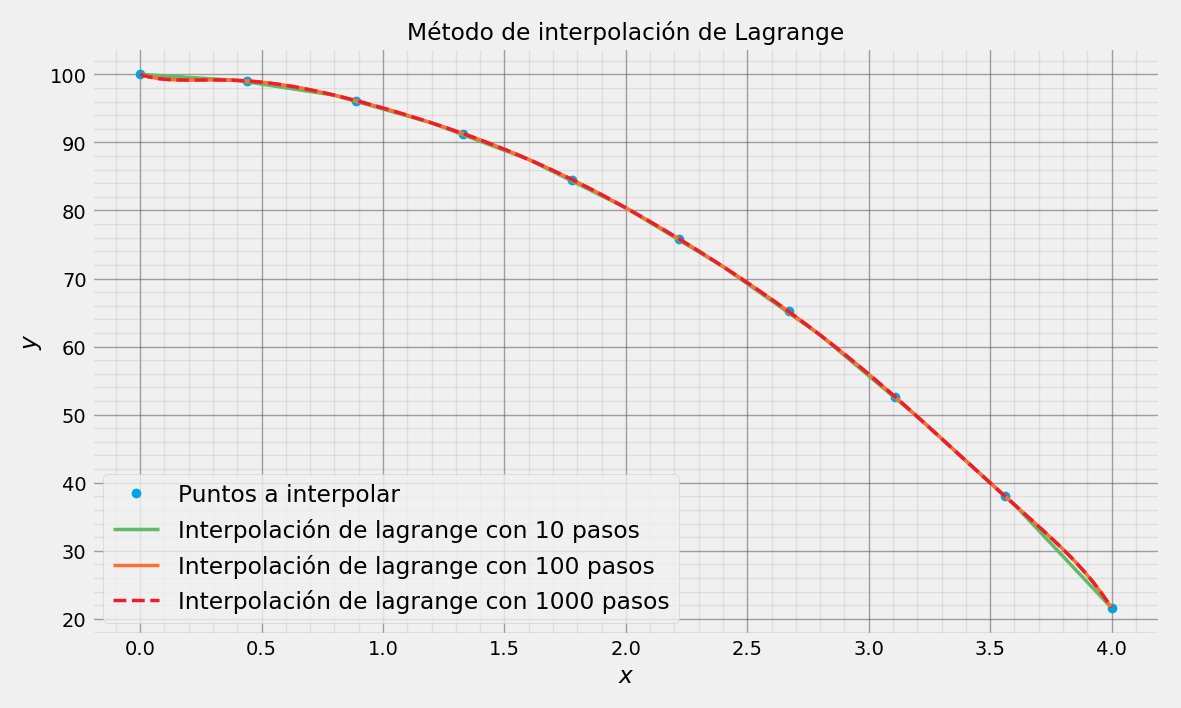

In [161]:
%matplotlib widget

plt.style.use('fivethirtyeight')

plt.figure(1, figsize = (cm2inch(30), cm2inch(18)), constrained_layout = True)

plt.plot(x_ex1, y_ex1, 'o', color = colors['blue'], linewidth = 2.5, label = 'Puntos a interpolar')

plt.plot(x_plot_ex1_pasos_10, y_polinomio_ex1_pasos_10, '-', color = colors['green'], linewidth = 2.5, label = 'Interpolación de lagrange con {} pasos'.format(npuntos_10))
plt.plot(x_plot_ex1_pasos_100, y_polinomio_ex1_pasos_100, '-', color = colors['orange1'], linewidth = 2.5, label = 'Interpolación de lagrange con {} pasos'.format(npuntos_100))
plt.plot(x_plot_ex1_pasos_1000, y_polinomio_ex1_pasos_1000, '--', color = colors['red'], linewidth = 2.5, label = 'Interpolación de lagrange con {} pasos'.format(npuntos_1000))

plt.ylabel('$y$', fontsize = 'large')
plt.xlabel('$x$', fontsize = 'large')
plt.title('Método de interpolación de Lagrange', fontsize = 'large')
plt.legend(framealpha = 0.8, fontsize = 'large')

plt.grid(visible = True, which = 'major', color = '#666666', linestyle = '-', alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)
plt.tight_layout()

# plt.savefig('ajuste_lineal_punto_1_taller_2.jpg', dpi = 1200, quality = 95)

plt.show()

# Ejemplo 2

In [151]:
# puntos a interpolar
x_ex2 = random.sample(range(20), 10) # genera una muestra aleatoria de números sin repetir
y_ex2 = random.sample(range(20), 10)

xmin = min(x_ex2)
xmax = max(x_ex2)

npuntos_10 = 10
npuntos_100 = 100
npuntos_1000 = 1000

x_plot_ex2_pasos_10 = ejex(xmin, xmax, npuntos_10)
y_polinomio_ex2_pasos_10 = polinomio_lagrange(x_ex2, y_ex2, xmin, xmax, npuntos_10)

x_plot_ex2_pasos_100 = ejex(xmin, xmax, npuntos_100)
y_polinomio_ex2_pasos_100 = polinomio_lagrange(x_ex2, y_ex2, xmin, xmax, npuntos_100)

x_plot_ex2_pasos_1000 = ejex(xmin, xmax, npuntos_1000)
y_polinomio_ex2_pasos_1000 = polinomio_lagrange(x_ex2, y_ex2, xmin, xmax, npuntos_1000)

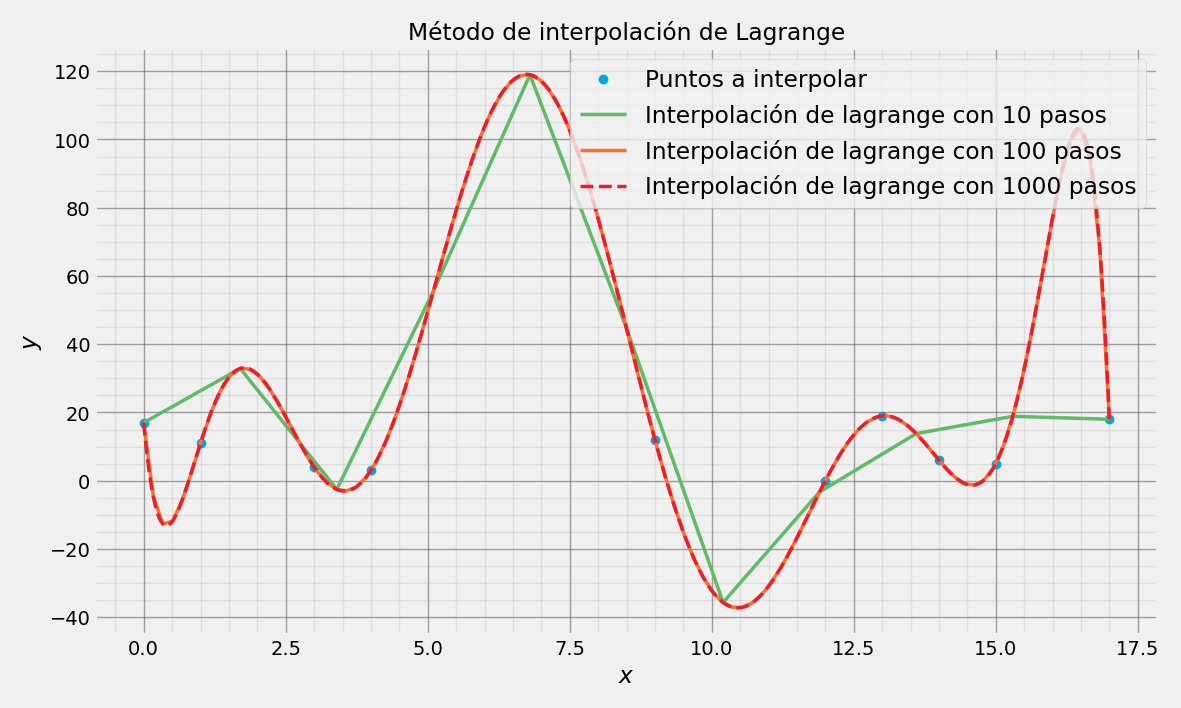

In [160]:
%matplotlib widget

plt.style.use('fivethirtyeight')

plt.figure(2, figsize = (cm2inch(30), cm2inch(18)), constrained_layout = True)

plt.plot(x_ex2, y_ex2, 'o', color = colors['blue'], linewidth = 2.5, label = 'Puntos a interpolar')

plt.plot(x_plot_ex2_pasos_10, y_polinomio_ex2_pasos_10, '-', color = colors['green'], linewidth = 2.5, label = 'Interpolación de lagrange con {} pasos'.format(npuntos_10))
plt.plot(x_plot_ex2_pasos_100, y_polinomio_ex2_pasos_100, '-', color = colors['orange1'], linewidth = 2.5, label = 'Interpolación de lagrange con {} pasos'.format(npuntos_100))
plt.plot(x_plot_ex2_pasos_1000, y_polinomio_ex2_pasos_1000, '--', color = colors['red'], linewidth = 2.5, label = 'Interpolación de lagrange con {} pasos'.format(npuntos_1000))

plt.ylabel('$y$', fontsize = 'large')
plt.xlabel('$x$', fontsize = 'large')
plt.title('Método de interpolación de Lagrange', fontsize = 'large')
plt.legend(framealpha = 0.8, fontsize = 'large')

plt.grid(visible = True, which = 'major', color = '#666666', linestyle = '-', alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)
plt.tight_layout()

# plt.savefig('ajuste_lineal_punto_1_taller_2.jpg', dpi = 1200, quality = 95)

plt.show()